In [1]:
import pandas as pd

df = pd.read_csv('Data/군집분석데이터.csv', encoding='ms949')
df.head()

,검색어,기사내용
0,유한양행,유한양행은 얀센 바이오테크(Janssen Biotech Inc)와 EGFR표적 항암...
1,유한양행,유한양행이 1조4000억원 규모의 기술이전 계약 체결 소식에 가격제한폭까지 치솟았다...
2,유한양행,유한양행이 다국적 제약사 얀센에 기술수출했다는 소식에 주가가 5일 장 초반 상한가를...
3,유한양행,"유한양행은 얀센 바이오테크((Janssen Biotech, Inc.)와 EGFR(상..."
4,유한양행,유한양행이 1조4000억원 규모 기술 수출 소식에 가격제한폭까지 치솟았다. 유한양행...


In [2]:
from konlpy.tag import Hannanum
han = Hannanum()

docs = []
for i in df['기사내용']:
    # 명사만 추출
    docs.append(han.nouns(i))
for i in range(len(docs)):
    # 명사들 사이에 공백을 붙여서 열거
    docs[i] = ' '.join(docs[i])
print(docs[0])

유한양행 얀센 바이오테크(Janssen 표적 항암 치료제 기술이전 계약 체결 5일 공시 기술수출금액 12억5500만달러(한화 약 1조3416억원 계약금 5000만달러 개발 허가 매출 단계별 마일스톤 12억500만달러 수령 예정 경상기술료 순매출액 책정 유한양행 관계자 기술이전 계약 수익 식 임상시험 허가 등 성공여부 수 미실현 가능성


In [6]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# BOW (Bag of Words)를 이용한 문서-단어 행렬 생성
# 문서집합에서 단어 토큰을 생성하고 각 단어의 수를 세어서 인코딩한 벡터를 생성(행은 문서번호, 컬럼은 각 단어)

# vec = CountVectorizer()   # 정수인코딩, 단어사전, 단어의 출현빈도
vec = TfidfVectorizer()   # 단어의 출현빈도를 더 자세히 보려 함

X = vec.fit_transform(docs)
df2 = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
df2.head()   # 중복단어 빼고 581개

,10대,10배,10분,12억500,12억500만달러,12억5500,12억5500만달러,12억5천500,15명,16,...,협조,호소력,홈페이지,확대,확인,확충,환경부,활동,후보물질,흡연
0,0.0,0.0,0.0,0.000000,0.182407,0.000000,0.141350,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.072612,0.000000,0.000000,0.072612,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
2,0.0,0.0,0.0,0.080221,0.000000,0.103522,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.155423,0.000000,0.000000,0.000000,0.200569,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.068982,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.089019,0.0


In [7]:
from sklearn.cluster import KMeans

#군집 개수를 3으로 설정

kmeans = KMeans(n_clusters=3,random_state=10).fit(df2)
# 실제 분석시에는 elbow point 확인
print(kmeans.labels_)

[1 1 1 1 1 2 2 2 2 2 0 0 0 0 0]


c:\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


          component 1  component 2
검색어                               
유한양행         0.465439    -0.274275
유한양행         0.564050    -0.349902
유한양행         0.448806    -0.279217
유한양행         0.454605    -0.266479
유한양행         0.482336    -0.285219
라돈           0.043862     0.372967
라돈           0.026781     0.413062
라돈           0.023662     0.587816
라돈           0.026048     0.689454
라돈           0.026371     0.619923
복면가왕 왕밤빵    -0.530838    -0.256730
복면가왕 왕밤빵    -0.481860    -0.224609
복면가왕 왕밤빵    -0.528182    -0.266369
복면가왕 왕밤빵    -0.557461    -0.271480
복면가왕 왕밤빵    -0.463617    -0.208944


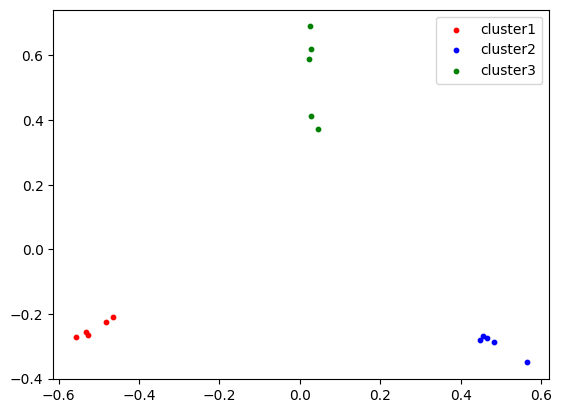

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# plotting을 위해 주성분분석으로 차원을 2차원으로 축소
pca = PCA(n_components=2,random_state=10)
components = pca.fit_transform(df2)
df3 = pd.DataFrame(data = components, columns = ['component 1', 'component 2'])
df3.index=df['검색어']
print(df3)
kmeans.labels_ == 0
# x축 : first, y축 : second 번호로 나타낸 후 시각화
plt.scatter(df3.iloc[kmeans.labels_ == 0, 0],
            df3.iloc[kmeans.labels_ == 0, 1], s = 10, c = 'red',  label = 'cluster1')
plt.scatter(df3.iloc[kmeans.labels_ == 1, 0],
            df3.iloc[kmeans.labels_ == 1, 1], s = 10, c = 'blue', label = 'cluster2')
plt.scatter(df3.iloc[kmeans.labels_ == 2, 0],
            df3.iloc[kmeans.labels_ == 2, 1], s = 10, c = 'green', label = 'cluster3')
plt.legend()